In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import integrate
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# 1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

## a. Primera integral:
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$
Esta integral es de tipo **impropia**, pues en $x=0$ hay una discontinuidad pues el valor de $tan(x)=0$.

Haciendo el cambio de variable:

$$ x = \frac{1}{t} \implies dx=\frac{-1}{t^{2}}dt$$

### Gráficas de las funciones:

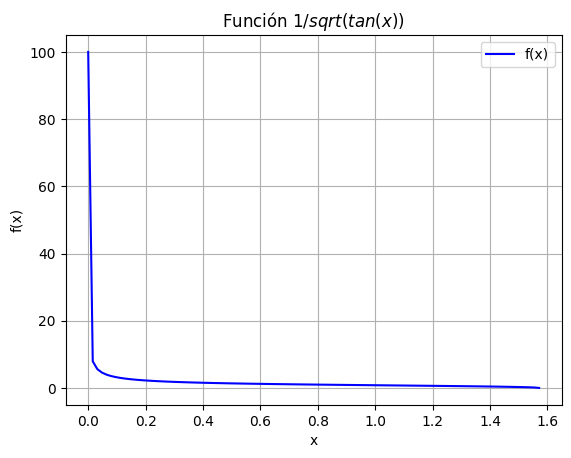

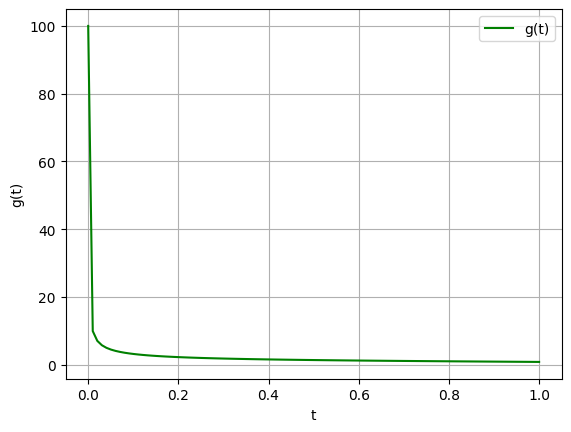

In [3]:
u = np.linspace(0.0001, np.pi/2, 100)
v = np.linspace(0.0001, 1, 100)
f = lambda x: 1/np.sqrt(np.tan(x))
g = lambda t: (np.pi/2)/np.sqrt(np.tan(np.pi*t/2))

plt.plot(u, f(u), 'b-', label='f(x)')
plt.title('Función $1/sqrt(tan(x))$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(v, f(v), 'g-', label='g(t)')
#plt.title('Función $1/sqrt(tan(pi*t/2))$')
plt.legend()
plt.xlabel('t')
plt.ylabel('g(t)')
plt.grid()
plt.show()

### Cálculo de la integra con f(x):

In [4]:
trapecio = trapezoid(f(u), u)
print(f'Área por trapecio. I = {trapecio}')

Simpson = simpson(f(u), x=u)
print(f'Área por Simpson. I = {Simpson}')

cuadratura, error = quad(f, 1e-5,np.pi/2)
print(f'Por cuadratura, I = {cuadratura}')
print(f'Error de cuadratura: {error}')

Área por trapecio. I = 2.8293281518238125
Área por Simpson. I = 2.590375089370066
Por cuadratura, I = 2.215116913771584
Error de cuadratura: 1.3154568294645624e-08


### Cálculo de la integral con f(t) (sustitución):

In [5]:
def convergencia_trapecio(f, a, b,n=2, tol = 1e-5, max_iter=100):
    h = (b-a)/n
    x = np.arange(a,b,h)
    I0 = trapezoid(f(x), x)
    #print(I0)

    for i in range(max_iter):
        h = h/2
        x = np.arange(a,b,h)
        I1 = trapezoid(f(x), x)
        #print(I1)
    
        if abs(I1 - I0) < tol:
            print(f'Converge luego de {i+1} iteraciones')
            return I1
    
        I0 = I1
    print(f'Luego de {i+1} iteraciones, no hay convergencia.')
    return I0

In [6]:
def convergencia_simpson(f, a, b,n=2, tol = 1e-5, max_iter=100):
    h = (b-a)/n
    x = np.arange(a,b,h)
    I0 = simpson(f(x), x=x)
    #print(I0)

    for i in range(max_iter):
        h = h/2
        x = np.arange(a,b,h)
        I1 = simpson(f(x), x=x)
        #print(I1)
    
        if abs(I1 - I0) < tol:
            print(f'Converge luego de {i+1} iteraciones')
            return I1
    
        I0 = I1
    print(f'Luego de {i+1} iteraciones, no hay convergencia.')
    return I0

In [7]:
g = lambda t: (np.pi/2)/np.sqrt(np.tan(np.pi*t/2))
u2 = np.linspace(1e-05,1,500)

trapecio = trapezoid(g(u2), u2)
print('El área por trapecio es:')
print(f'I = {trapecio}')

Simpson = simpson(g(u2), x=u2)
print('La integral por Simpson es:')
print(f'I = {Simpson}')

cuadratura, error = quad(g, 1e-5, 1)
print(f'Por cuadratura, I = {cuadratura}')

El área por trapecio es:
I = 2.5362284669019397
La integral por Simpson es:
I = 2.4151470202972884
Por cuadratura, I = 2.2135148144967536


In [8]:
print('Integral por trapecio:')
rapecio = convergencia_trapecio(g,0.001,1)
print(trapecio)
print('Integral por Simpson:')
A = convergencia_simpson(g,0.001,1)
print(A)

Integral por trapecio:
Converge luego de 14 iteraciones
2.5362284669019397
Integral por Simpson:
Converge luego de 11 iteraciones
2.1421712246734033


## b. Segunda integral:
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
$$

Haciendo la sustitución:

$$ x = \frac{1}{t} \implies dx = -\frac{1}{t^{2}}dt$$

$$
 \int_{0}^{1} \cos(\frac{1}{t}) t\mathrm{dt}
$$

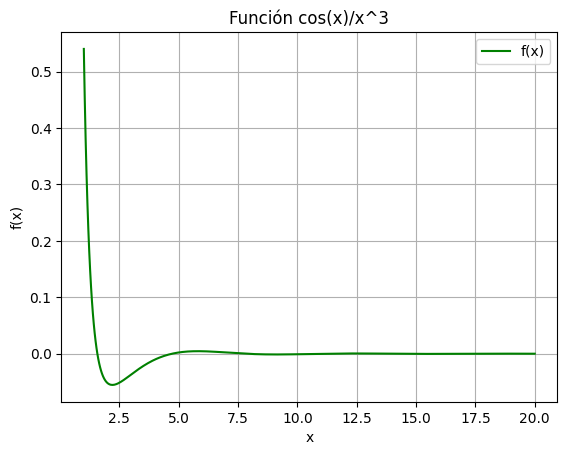

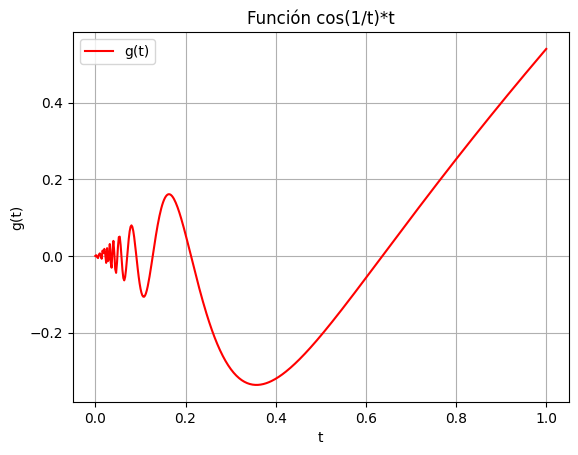

In [9]:
x = np.linspace(1, 20, 500)
f = lambda x: np.cos(x)/(x**3)

g = lambda t: np.cos(1/t)*t
t = np.linspace(1e-05,1,500)

plt.plot(x, f(x), 'g-', label='f(x)')
plt.title('Función cos(x)/x^3')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(t, g(t), 'r-', label='g(t)')
plt.title('Función cos(1/t)*t')
plt.legend()
plt.xlabel('t')
plt.ylabel('g(t)')
plt.grid()
plt.show()

### Sustitución, sin convergencia:

In [10]:
g = lambda t: np.cos(1/t)*t
t = np.linspace(1e-05,1,500)

trapecio = trapezoid(g(t),t)
print('Integral por trapecio:')
print(f'I = {trapecio}')

Simpson = simpson(g(t),x=t)
print('Integral por Simpson:')
print(f'I = {Simpson}')

Cuadratura, error = quad(g, 0.01, 1)
print('Integral por cuadratura gaussiana:')
print(f'I = {Cuadratura}')

Integral por trapecio:
I = 0.018190124086369816
Integral por Simpson:
I = 0.01818563286104828
Integral por cuadratura gaussiana:
I = 0.01811709040274772


### Por convergencia:

In [11]:
print('Por trapecio:')
trapecio = convergencia_trapecio(g, 1e-05, 1)
print(trapecio)

print('Por simpson:')
A = convergencia_simpson(g, 1e-05, 1)
print(A)

Por trapecio:
Converge luego de 15 iteraciones
0.01810937713655829
Por simpson:
Converge luego de 15 iteraciones
0.018109392583697613


## c. Tercera integral:
$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

### Por Sympy:

In [35]:
y = sp.Symbol('y')
x = sp.Symbol('x')
f = 1/sp.sqrt(1-y**2)
nx, ny = 10, 10
a, b = 0, sp.sin(x)
c, d = 0, np.pi/4

F = sp.integrate(f,(y,a,b))
F

asin(sin(x))

In [40]:
f_x = lambda x: x
x = np.linspace(c,d,50)
trapecio = trapezoid(f_x(x),x)
print(f'Por método del trapecio: I = {trapecio}')

Por método del trapecio: I = 0.30842513753404244


In [44]:
print('Por trapecio:')
trapecio = convergencia_trapecio(f_x, 0, np.pi/4)
print(trapecio)

print('Por simpson:')
A = convergencia_simpson(f_x, 0, np.pi/4)
print(A)

print('Por cuadratura gaussiana:')
quadrature, error_q = quad(f_x, 0, np.pi/4)
print(quadrature)

Por trapecio:
Converge luego de 15 iteraciones
0.30841572521762284
Por simpson:
Converge luego de 15 iteraciones
0.30841572521762284
Por cuadratura gaussiana:
0.30842513753404244


### Por cuadratura:

In [21]:
integral = lambda y: 1/np.sqrt(1-y**2)

a, b = 0, lambda x: np.sin(x)
c, d = 0, np.pi/4

def integral_y(x):
    return quad(integral, a, b(x))[0]

integral_x, error_x = quad(integral_y, c, d)
integral_x

0.30842513753404244

# 2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



## Gráficas de posición vs tiempo:

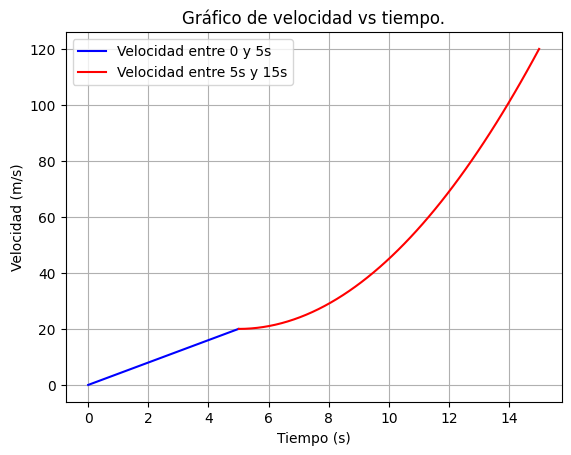

In [2]:
v1 = lambda t: 4*t
v2 = lambda t: 20 + (5-t)**2

t1 = np.linspace(0,5,50)
t2 = np.linspace(5.01,15,50)

plt.plot(t1, v1(t1), 'b-', label='Velocidad entre 0 y 5s')
plt.plot(t2, v2(t2), 'r-', label='Velocidad entre 5s y 15s')
plt.title('Gráfico de velocidad vs tiempo.')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid()
plt.show()

In [3]:
distancia_0, error_0 = quad(v1,0,5)
print(f'Distancia de 0 a 5s: r = {distancia_0} m')

distancia_1, error_1 = quad(v2,5.01,15)
print(f'Distancia de 5s a 15s: r = {distancia_1} m')

distancia_total = distancia_0 + distancia_1
print(f'Distancia total = {distancia_total} m')

Distancia de 0 a 5s: r = 50.0 m
Distancia de 5s a 15s: r = 533.133333 m
Distancia total = 583.133333 m


In [4]:
t = sp.Symbol('t')
v1 = 4*t
v2 = 20 + (5-t)**2

d1 = integrate(v1,t)
d2 = integrate(v2,t)

In [12]:
d_1 = sp.lambdify(t,d1)
d_2 = sp.lambdify(t,d2)

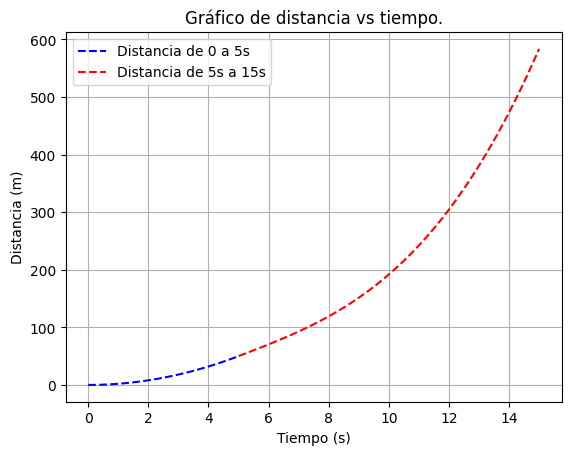

In [16]:
C = np.abs(d_2(5) - d_1(5))
dist1 = d_1(t1)
dist2 = d_2(t2) - C

plt.plot(t1, dist1, 'b--', label='Distancia de 0 a 5s')
plt.plot(t2, dist2, 'r--', label='Distancia de 5s a 15s')
plt.title('Gráfico de distancia vs tiempo.')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.grid()
plt.show()

## Cálculo del trabajo $(W)$:

El trabajo se define como:

$$ W_{ab} = \int_{a}^{b} \vec{F} \cdot d\vec{r} $$

In [18]:
F = 200
a1 = d_1(0)
b1 = d_1(5)
a2 = d_2(5)
b2 = d_2(15)
W1 = F*(b1-a1)
W2 = F*(b2-a2)

print(f'Trabajo entre 0 y {d_1(5)} m = {W1} J')
print(f'Trabajo entre 0 y {d_2(15)} m = {W2} J')

print(f'Trabajo total = {W1+W2} J')

Trabajo entre 0 y 50 m = 10000 J
Trabajo entre 0 y 675.0 m = 106666.66666666667 J
Trabajo total = 116666.66666666667 J


# 3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m $^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 min$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


### Gráficas de caudal y concentración:

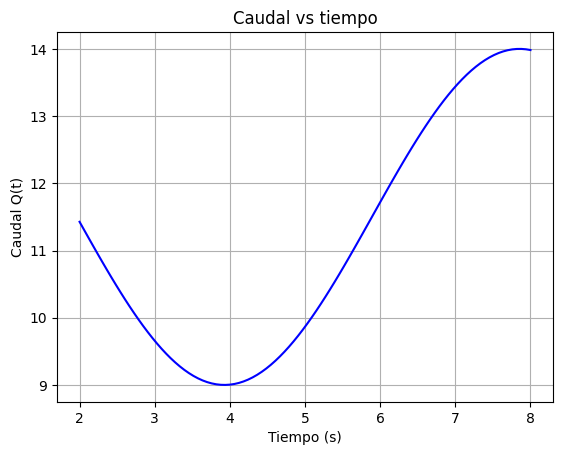

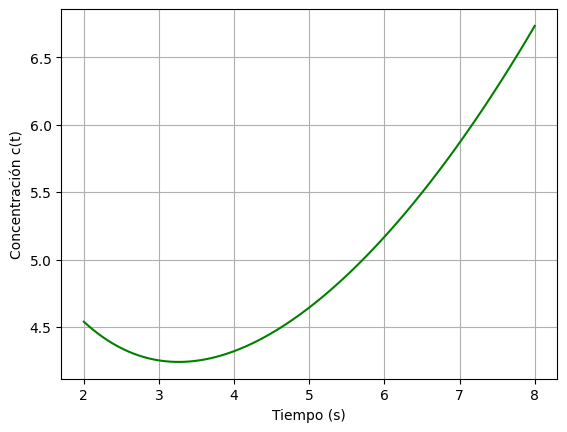

In [ ]:
Q = lambda t: 9 + 5*(np.cos(0.4*t)**2)
c = lambda t: 5*np.exp(-0.5*t) + 2*np.exp(0.15*t)

t = np.linspace(2, 8, 100)

plt.plot(t, Q(t), 'b-', label='Caudal')
plt.title('Caudal vs tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Caudal Q(t)')
plt.grid()
plt.show()
plt.plot(t, c(t), 'g-', label='Concentración')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración c(t)')
plt.grid()
plt.show()

### Integrales:

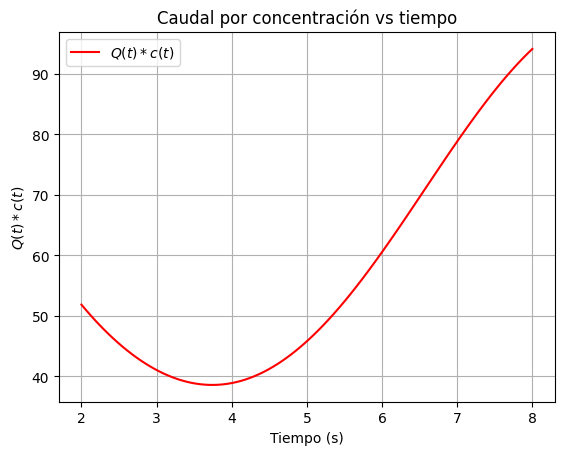

Por método de Romberg:
I = 335.9625300616253


C:\Users\GABYA\AppData\Local\Temp\ipykernel_8872\1724245195.py:11: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  I = romberg(Q_c, 2, 8)


In [ ]:
Q_c = lambda t: (9 + 5*(np.cos(0.4*t)**2))*(5*np.exp(-0.5*t) + 2*np.exp(0.15*t))

plt.plot(t, Q_c(t), 'r-', label='$Q(t)*c(t)$')
plt.title('Caudal por concentración vs tiempo')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('$Q(t)*c(t)$')
plt.grid()
plt.show()

I = romberg(Q_c, 2, 8)
print(f'Por método de Romberg:')
print(f'I = {I}')

In [ ]:
I = quad(Q_c, 2, 8)[0]
print('Por método de cuadratura gaussiana adaptativa:')
print(f'I = {I}')

Por método de cuadratura gaussiana adaptativa:
I = 335.9625300616257


# 4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

## Definiendo la función:

In [ ]:
b = 0.20 # Longitud de la varilla (metros)
m = 0.2 # Masa de la varilla (kilogramos)
#b = 0.10
g = 9.8 # Aceleración de la gravedad (m/s^2)

#Calculamos el momento de inercia suponiendo una varilla uniforme de longitud l:
Io = (1/12)*m*(b**2)
print('Momento de inercia:')
print(f'Io = {Io}')

#Calculamos ahora el periodo para oscilaciones pequeñas:
Po = 2*np.pi*np.sqrt(Io/(m*g*b))
print('Periodo para oscilaciones pequeñas:')
print(f'Po = {Po} s')

#Definimos el ángulo para oscilaciones pequueñas y el parmetro k:
theta_cero = 0.1
k = np.sin(theta_cero/2)

Momento de inercia:
Io = 0.0006666666666666668
Periodo para oscilaciones pequeñas:
Po = 0.25911419489060256 s


In [ ]:
phi = sp.Symbol('phi')
f = (2*Po/np.pi)*(1/sp.sqrt(1-(k**2)*sp.sin(phi)**2))
f

0.164957219768465/sqrt(1 - 0.00249791736098712*sin(phi)**2)

## Valor *exacto* calculado por Sympy:

In [ ]:
from sympy import integrate

I = integrate(f, (phi,0,np.pi/2))
print(I)

0.259276234105030


In [ ]:
f_l = sp.lambdify(phi, f)

## Por medio de los métodos de cuadratura adaptativa y trapecio:

Para la integral vamos a emplear el método de cuadratura gaussiana:

In [ ]:
P, error = quad(f_l,0,np.pi/2)
print('Por método de cuadratura gaussiana:')
print(f'P = {P}')

Por método de cuadratura gaussiana:
P = 0.25927623410503065


Comparemos con el método del trapecio:

In [ ]:
angle = np.linspace(0, np.pi/2, 100)
P = trapezoid(f_l(angle), angle)
print('Por método del trapecio:')
print(f'P = {P}')

Por método del trapecio:
P = 0.2592762341050307


# 5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
f = lambda t: 22.8/(3.5 + 7*(t-1.25)**4)
tiempo = np.linspace(0,2,100)

quad_adap = quad(f,0,2)[0]
print('Por cuadratura adaptativa:')
print(f'I = {quad_adap}')

trapecio = trapezoid(f(tiempo),tiempo)
print('Por método del trapecio:')
print(f'I = {trapecio}')

Por cuadratura adaptativa:
I = 9.991854348486756
Por método del trapecio:
I = 9.991473836185547


Se puede decir que la cantidad de autos que cruzan entre las 4:00 pm y las 6:00 pm se acerca al número entrero 10, puesto que por ambos métodos se obtiene hasta el orden de las diezmilésimas el valor redondeado de: 9.991.

In [ ]:
diferencia = abs(trapecio - quad_adap)
print('La diferencia entre los métodos es de:')
print(f'Diferencia = {diferencia}')

La diferencia entre los métodos es de:
Diferencia = 0.00038051230120927926


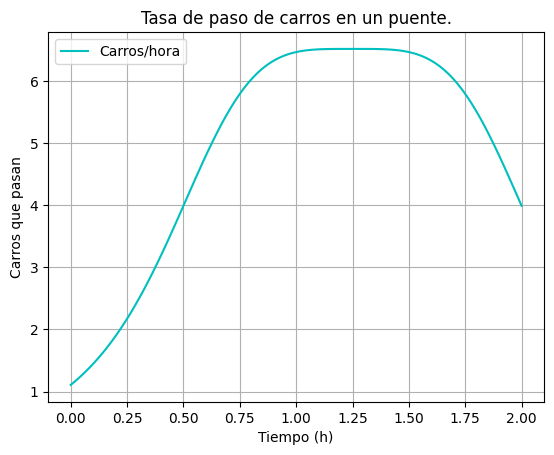

In [ ]:
plt.plot(tiempo, f(tiempo), 'c', label='Carros/hora')
plt.title('Tasa de paso de carros en un puente.')
plt.legend()
plt.xlabel('Tiempo (h)')
plt.ylabel('Carros que pasan')
plt.grid()
plt.show()

In [ ]:
t = sp.Symbol('t')
funcion = 22.8/(3.5 + 7*(t-1.25)**4)

#F = sp.integrate(funcion, (t,0,2))
#F

# 6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


## $A(r=1.1, \theta)$:

### Cálculo de la función $k(\theta)$:

Aquí tendremos en cuenta los parámetros de las constentes:

$ a = 1$,  $\mu_{0}/4\pi = 1$, $I = 3$

Además teniendo en cuenta la instrucción de que:

$$ A_{\phi}(r=1.1,\theta)$$

In [16]:
z = sp.symbols('z') #Z hace las de la variable theta.
a = 1
r = 1.1
k_2 = (4*a*r*sp.sin(z))/(a**2 + r**2 + 2*a*r*sp.sin(z))
k_2l = sp.lambdify(z,k_2)
k_2

4.4*sin(z)/(2.2*sin(z) + 2.21)

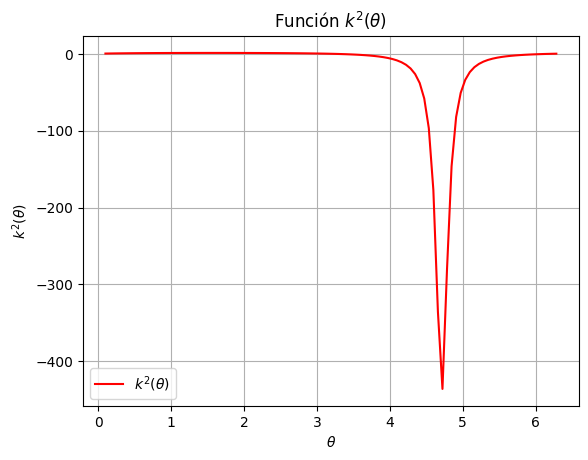

In [17]:
theta_values = np.linspace(0.1, 2*np.pi, 100)
k_values = k_2l(theta_values)
#print(k_values)

plt.plot(theta_values, k_values, 'r-', label='$k^2(θ)$')
plt.title('Función $k^2(θ)$')
plt.legend()
plt.xlabel('$θ$')
plt.ylabel('$k^2(θ)$')
plt.grid()
plt.show()

### Cálculo de la función $E(k)$:

In [18]:
def E(k_valores, a, b):
    E_prima = lambda p: np.sqrt(1 - k_valores*np.sin(p)**2)
    I = quad(E_prima, a, b)[0]
    return I

resultados_E = np.zeros(len(k_values))

for i, j in enumerate(k_values):
    resultados_E[i] = E(j,0,np.pi/2)
#print(resultados_E)

### Cálculo de la función $K(k)$:

In [19]:
def K(k_valores, a, b):
    K_prima = lambda p: 1/np.sqrt(1 - k_valores*np.sin(p)**2)
    I = quad(K_prima, a, b)[0]
    return I

resultados_K = np.zeros_like(k_values)

for i, j in enumerate(k_values):
    resultados_K[i] = K(j,0,np.pi/2)

### Cálculo de $A(r=1.1,\theta)$:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

In [23]:
def A(a, I_, cte, r, fE, fK, theta, k):
    A_ = cte*((4*I_*a)/np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))) * ((2-k)*fK - 2*fE)/k
    return A_

In [25]:
a, I_, cte= 1, 3, 1
fA_1 = A(a,I_,cte,r, resultados_E, resultados_K, theta_values, k_values)

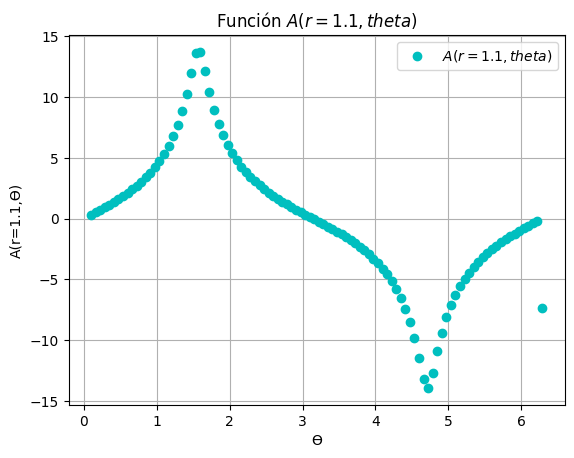

In [28]:
plt.plot(theta_values, fA_1, 'co', label='$A(r=1.1, theta)$')
plt.title('Función $A(r=1.1, theta)$')
plt.legend()
plt.xlabel('ϴ')
plt.ylabel('A(r=1.1,ϴ)')
plt.grid()
plt.show()

## $A(r,\theta=\pi/3)$:

### Cálculo de $k(\theta)^2$:

In [95]:
k_2 = lambda r, z = np.pi/3: (4*a*r*np.sin(z))/(a**2 + r**2 + 2*a*r*np.sin(z))
r = np.linspace(0.01,2,100)
k_values = k_2(r)

### Cálculo de $E(k)$:

In [100]:
def E(k_valores, a, b):
    E_prima = lambda p: np.sqrt(1 - k_valores*np.sin(p)**2)
    I = quad(E_prima, a, b)[0]
    return I

resultados_E = np.zeros(len(k_values))

for i, j in enumerate(k_values):
    resultados_E[i] = E(j,0,np.pi/2)

#resultados_E

### Cálculo de $K(k)$:

In [102]:
def K(k_valores, a, b):
    K_prima = lambda p: 1/np.sqrt(1 - k_valores*np.sin(p)**2)
    I = quad(K_prima, a, b)[0]
    return I

resultados_K = np.zeros_like(k_values)

for i, j in enumerate(k_values):
    resultados_K[i] = K(j,0,np.pi/2)

#resultados_K

In [104]:
def A(a, I_, cte, r, fE, fK, theta, k):
    A_ = cte*((4*I_*a)/np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))) * ((2-k)*fK - 2*fE)/k
    return A_

In [ ]:
a, I_, cte= 1, 3, 1
theta = np.pi/3
fA_1 = A(a,I_,cte,r, resultados_E, resultados_K, theta_values, k_values)

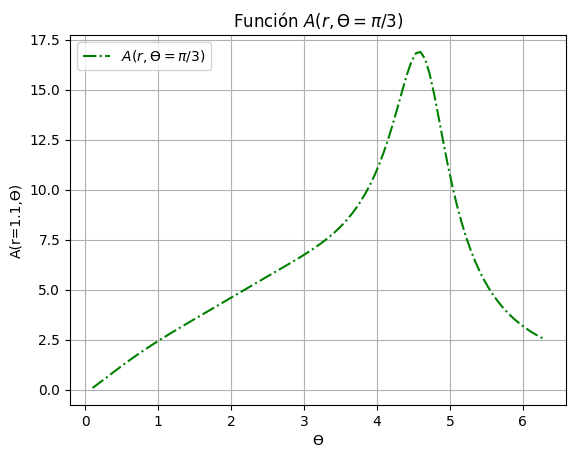

In [115]:
plt.plot(theta_values, fA_1, 'g-.', label=r'$A(r, ϴ = \pi/3)$')
plt.title(r'Función $A(r, ϴ = \pi/3)$')
plt.legend()
plt.xlabel('ϴ')
plt.ylabel('A(r=1.1,ϴ)')
plt.grid()
plt.show()